Please **submit this Jupyter notebook through Canvas** no later than **Friday December 14, 10:59**, before the start of the lecture.

The final project is in **groups of three**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

A single, jointly written report for each group is fine. All members in a group will receive the same grade.

# Exercise 0

**Jordan Earle** (12297127)

**Natasja Wezel** (11027649)

**Esra** (10001812)

----
# Project keywords
Interpolation, least squares, optimization, nonlinear least squares

----
# Project description
In this assignment,  we will explore methods for data fitting and interpolation. Given a dataset of some quantity at different moments in time, such methods can be used to predict future values as well as to compute values at past times where we do not have observations.

Consider the following data set for Arctic sea ice minimum, an important climate signal. Arctic sea ice extent reaches a minimum every year in September. The data, obtained from NASA (see
https://climate.nasa.gov/vital-signs/arctic-sea-ice/), shows the minimum sea ice extent reached in different years. 
In the table, $t$ denotes the year, $s$ denotes the sea ice extent in million square kilometers.

The aim of this project is to explore various ways of fitting functions to this dataset, and see how well they perform and how robust they are.

In [4]:
import numpy as np
import matplotlib.pyplot as plt


years = np.array([1979, 1982, 1985, 1988, 1991, 1994, 1997, 2000, 2003, 2006, 2009, 2012, 2015, 2016], dtype=np.float64)
ice_areas = np.array([7.00, 7.34, 6.79, 7.47, 6.46, 7.15, 6.85, 6.37, 6.21, 5.97, 5.31, 3.40, 4.59, 4.30], dtype=np.float64)

# these are the points we're asked to predict at some point in the exercises
years_to_predict = np.array([1984, 2016, 2017, 2018], dtype=np.float64)
ice_areas_actual = np.array([6.8, 4.3, 4.6, 4.8], dtype=np.float64)

----
# Project exercises
## Exercise 1
Read sections 7.1 - 7.3 from the book by Heath.

$\checkmark$

## Exercise 2
For constructing a polynomial interpolating function through the data, consider the following possible sets of basis functions: (a) the set $\phi_j(t)=t^{j-1}$ (these are the regular monomials), (b) the set $\phi_j(t)=(t-1978)^{j-1}$, (c) the set $\phi_j(t)=((t-1998)/18)^{j-1}$. The index $j$ runs from 1 to $J$.

What should be the value of $J$? For each of the sets of basis functions (a), (b), (c), compute the corresponding Vandermonde matrix. How do their condition numbers compare?

The values of J should run from 1 to length(input) where the input is the dates data.

In [5]:
# fill with ones (because the first column is always ones)
phi1 = np.ones((len(years),len(years)))
phi2 = np.ones((len(years),len(years)))
phi3 = np.ones((len(years),len(years)))

# set up Vandermonde matrix for each basis function
for i in range(0, len(years)):
    for j in range(0, len(years)):
        phi1[i][j] = years[i]**j
        phi2[i][j] = (years[i] - 1978)**j 
        phi3[i][j] = ((years[i] - 1998)/18)**j 

print("Condition number of basis (a) is: ", np.linalg.cond(phi1))
print("Condition number of basis (b) is: ", np.linalg.cond(phi2))
print("Condition number of basis (c) is: ", np.linalg.cond(phi3))

Condition number of basis (a) is:  2.9138298687044305e+56
Condition number of basis (b) is:  8.36070803560451e+20
Condition number of basis (c) is:  225102.97749699058


The condition number of basis (c) is much better conditioned than that of condition (a) or (b).  Though (c) is still not very well condtioned, meaning that it will be sensitive towards small changes in the input.

## Exercise 3
Use the set of basis functions with the best conditioning and compute the interpolating function through the data in the table above. Show the coefficients of the interpolating function in a table. Plot the data points and the interpolating function in a single figure. Discuss the results.

What values does this interpolating function predict for $t=1984$? What values for $t=2017$ and $t=2018$? Check the NASA website mentioned in the introduction to see how good these predictions are.

In [6]:
# use same time range everywhere
time_steps = np.linspace(1978, 2020, 100000)

In [7]:
# calculate coefficients for the function
coefficients = np.linalg.solve(phi3, ice_areas)

In [8]:
# set up matrix (I still don't really understand this way of interpolating - Natasja)
def make_matrix(time_list, coefficients):
    A = np.ones((len(time_list),len(coefficients)))
    for i in range(0, len(time_list)-1):
        for j in range(0, A.shape[1]):
            A[i][j] = ((time_list[i] - 1998)/18)**j 
    return A

In [9]:
# set up interpolation function
def get_function_value(time_step, c):
    x = ((time_step-1998)/18)
    
    y = c[13] * x**13 + c[12] * x**12 + c[11] * x**11 + c[10] * x**10 + c[9] * x**9 + c[8] * x**8 +\
        c[7] * x**7 + c[6] * x**6 + c[5] * x**5 + c[4] * x**4 + c[3] * x**3 + c[2] * x**2 + c[1] * x + c[0]
    
    return y

Predicted Ice surface in 1984:  5.113976036204813
Predicted Ice surface in 2016:  4.300000000000601
Predicted Ice surface in 2017:  -0.13812550522226275
Predicted Ice surface in 2018:  -12.531946103030599


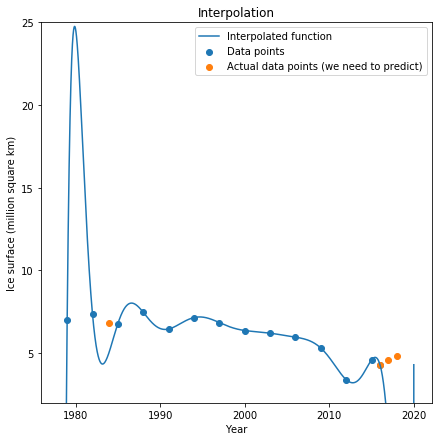

In [10]:
A = make_matrix(time_steps, coefficients)

interpolation_ice_area = A.dot(coefficients)

# Plot it!
plt.figure(figsize=(7,7))
plt.title("Interpolation")
plt.ylabel("Ice surface (million square km)")
plt.xlabel("Year")

plt.scatter(years, ice_areas, label='Data points')
plt.plot(time_steps, interpolation_ice_area, label='Interpolated function')
plt.scatter(years_to_predict, ice_areas_actual, label="Actual data points (we need to predict)")

plt.ylim(2, 25)
plt.legend()

# predicted points
print("Predicted Ice surface in 1984: ", get_function_value(1984, coefficients))
print("Predicted Ice surface in 2016: ", get_function_value(2016, coefficients))
print("Predicted Ice surface in 2017: ", get_function_value(2017, coefficients))
print("Predicted Ice surface in 2018: ", get_function_value(2018, coefficients))

## Exercise 4
How sensitive are the results to small changes in the data? To assess this, add (modest) random perturbations to the $s$ values in the dataset and recompute the interpolating function. Plot the new interpolating function together with the old one, and compare them. Also, use the new function to predict values for $t=1984$, $t=2016$ and $t=2017$, and compare these to the predictions you made before.

Predicted Ice surface in 1984:  5.116283755202924
Predicted Ice surface in 2016:  4.415860740061504
Predicted Ice surface in 2017:  0.7883473901201192
Predicted Ice surface in 2018:  -10.192466914711176


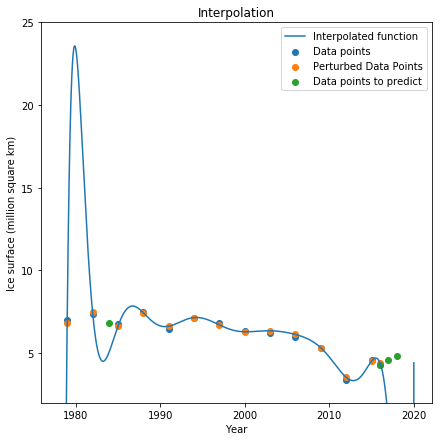

In [35]:
perturbed_ice_areas = []

for data_point in ice_areas:
    noise = np.random.rand()/2 - 0.25

    # add noise between -0.1 and 0.1
    perturbed_data_point = data_point + noise
    perturbed_ice_areas.append(perturbed_data_point)

pert_coefficients = np.linalg.solve(phi3, perturbed_ice_areas)

A = make_matrix(time_steps, pert_coefficients)

interpolation_perturbed = A.dot(pert_coefficients)

plt.figure(figsize=(7,7))
plt.scatter(years, ice_areas, label='Data points')
plt.scatter(years, perturbed_ice_areas, label='Perturbed Data Points')
plt.plot(time_steps, interpolation_perturbed, label='Interpolated function')
plt.scatter(years_to_predict, ice_areas_actual, label="Data points to predict")
plt.ylim(2, 25)
plt.legend()

plt.title("Interpolation")
plt.ylabel("Ice surface (million square km)")
plt.xlabel("Year")

print("Predicted Ice surface in 1984: ", get_function_value(1984, pert_coefficients))
print("Predicted Ice surface in 2016: ", get_function_value(2016, pert_coefficients))
print("Predicted Ice surface in 2017: ", get_function_value(2017, pert_coefficients))
print("Predicted Ice surface in 2018: ", get_function_value(2018, pert_coefficients))

## Exercise 5
As an alternative to interpolation, one can use minimization (e.g. linear least squares) to fit a function to the data. Use linear least squares to fit a low-degree (e.g., quadratic or cubic) polynomial to the data in the table. Plot the resulting function together with the data. Make predictions for values at $t=1984$, $t=2017$ and $t=2018$. Compare the results to the results obtained before with interpolation.

Explore the sensitivity of the least squares fit to changes in the data, in the same way as before.

In [13]:
# Quadratic function fitting

# Design the matrix 
Qm = np.array([[T**2, T, 1] for T in years])
# Find the parameters
qp, res, rnk, s = np.linalg.lstsq(Qm, ice_areas, rcond=None)
# Create the line 
xQ = np.linspace(1970, 2020, 500)
# Calculate the line with the parameters 
yQ = qp[0]*xQ**2 + qp[1]*xQ + qp[2]

In [14]:
# Cubic function fitting

# Design the matrix 
Cm = np.array([[T**3, T**2, T, 1] for T in years])
# Find the parameters
cp, res, rnk, s = np.linalg.lstsq(Cm, ice_areas, rcond=None)
# Create the line 
xC = np.linspace(1970, 2020, 500)
# Calculate the line with the parameters 
yC = cp[0]*xC**3 + cp[1]*xC**2 + cp[2]*xC + cp[3]

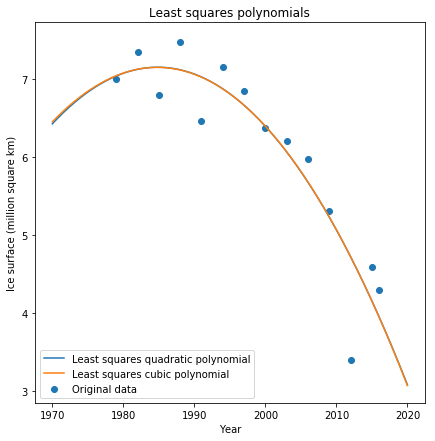

In [30]:
# Plot both fittings 
plt.figure(figsize=(7,7))
plt.title("Least squares polynomials")
plt.ylabel("Ice surface (million square km)")
plt.xlabel("Year")
plt.plot(xQ, yQ, label='Least squares quadratic polynomial')
plt.plot(xC, yC, label='Least squares cubic polynomial')
plt.scatter(years, ice_areas, label='Original data')
plt.legend()
plt.show()

In [33]:
y_q1984 = qp[0]*1984**2 + qp[1]*1984 + qp[2]
y_c1984 = cp[0]*1984**3 + cp[1]*1984**2 + cp[2]*1984 + cp[3]

y_q2016 = qp[0]*2016**2 + qp[1]*2016 + qp[2]
y_c2016 = cp[0]*2016**3 + cp[1]*2016**2 + cp[2]*2016 + cp[3]

y_q2017 = qp[0]*2017**2 + qp[1]*2017 + qp[2]
y_c2017 = cp[0]*2017**3 + cp[1]*2017**2 + cp[2]*2017 + cp[3]

y_q2018 = qp[0]*2018**2 + qp[1]*2018 + qp[2]
y_c2018 = cp[0]*2018**3 + cp[1]*2018**2 + cp[2]*2018 + cp[3]


print('Predictions for t = 1984: ', 'quadratic: ', y_q1984, 'cubic: ', y_c1984)
print('Predictions for t = 2016: ', 'quadratic: ', y_q2016, 'cubic: ', y_c2016)
print('Predictions for t = 2017: ', 'quadratic: ', y_q2017, 'cubic: ', y_c2017)
print('Predictions for t = 2018: ', 'quadratic: ', y_q2018, 'cubic: ', y_c2018)

Predictions for t = 1984:  quadratic:  7.148930426077641 cubic:  7.147829675454364
Predictions for t = 2016:  quadratic:  3.956849248670551 cubic:  3.9546376036327504
Predictions for t = 2017:  quadratic:  3.7485253701925103 cubic:  3.74507238724475
Predictions for t = 2018:  quadratic:  3.533621410399064 cubic:  3.5287435386875816


## Exercise 6

Fitting a function using linear least squares can be sensitive to "outliers" in the data. As an example, create a single outlier by changing the data point for $t=2009$ from $s=5.31$ to $s=7.31$. Repeat the linear least squares fitting procedure. Discuss your results.

In [17]:
p_years = np.array([1979, 1982, 1985, 1988, 1991, 1994, 1997, 2000, 2003, 2006, 2009, 2012, 2015, 2016], dtype=np.float64)
ice_p_areas = np.array([7.00, 7.34, 6.79, 7.47, 6.46, 7.15, 6.85, 6.37, 6.21, 5.97, 7.31, 3.40, 4.59, 4.30], dtype=np.float64)

In [18]:
# Quadratic function fitting

# Design the matrix 
pQm = np.array([[T**2, T, 1] for T in p_years])

# Find the parameters
pqp, res, rnk, s = np.linalg.lstsq(Qm, ice_p_areas, rcond=None)

# Create the line 
pxQ = np.linspace(1970, 2020, 500)

# Calculate the line with the parameters 
pyQ = pqp[0]*pxQ**2 + pqp[1]*pxQ + pqp[2]

In [19]:
# Cubic function fitting

# Design the matrix 
pCm = np.array([[T**3, T**2, T, 1] for T in p_years])
# Find the parameters
pcp, res, rnk, s = np.linalg.lstsq(Cm, ice_p_areas, rcond=None)
# Create the line 
pxC = np.linspace(1970, 2020, 500)
# Calculate the line with the parameters 
pyC = pcp[0]*pxC**3 + pcp[1]*pxC**2 + pcp[2]*pxC + pcp[3]

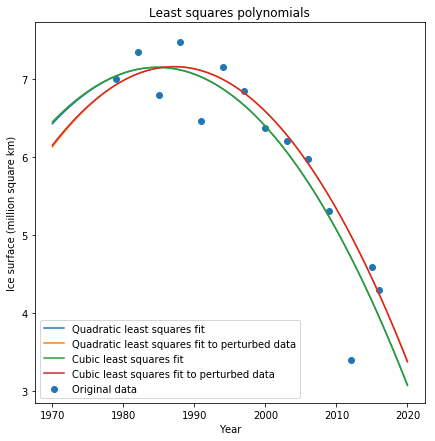

In [32]:
# Plot all four fittings

plt.figure(figsize=(7,7))
plt.title("Least squares polynomials")
plt.ylabel("Ice surface (million square km)")
plt.xlabel("Year")

plt.plot(xQ, yQ, label='Quadratic least squares fit')
plt.plot(pxQ, pyQ, label='Quadratic least squares fit to perturbed data')

plt.plot(xC, yC, label='Cubic least squares fit')
plt.plot(pxC, pyC, label='Cubic least squares fit to perturbed data')

plt.scatter(p_years, ice_areas, label='Original data')

plt.legend()
plt.show()

In [34]:
py_q1984 = pqp[0]*1984**2 + pqp[1]*1984 + pqp[2]
py_c1984 = pcp[0]*1984**3 + pcp[1]*1984**2 + pcp[2]*1984 + pcp[3]

py_q2016 = qp[0]*2016**2 + qp[1]*2016 + qp[2]
py_c2016 = cp[0]*2016**3 + cp[1]*2016**2 + cp[2]*2016 + cp[3]

py_q2017 = pqp[0]*2017**2 + pqp[1]*2017 + pqp[2]
py_c2017 = pcp[0]*2017**3 + pcp[1]*2017**2 + pcp[2]*2017 + pcp[3]

py_q2018 = pqp[0]*2018**2 + pqp[1]*2018 + pqp[2]
py_c2018 = pcp[0]*2018**3 + pcp[1]*2018**2 + pcp[2]*2018 + pcp[3]

print('Predictions from a perturbed dataset')
print('Predictions for t = 1984: ', 'quadratic: ', py_q1984, 'cubic: ', py_c1984)
print('Predictions for t = 2016: ', 'quadratic: ', py_q2016, 'cubic: ', py_c2016)
print('Predictions for t = 2017: ', 'quadratic: ', py_q2017, 'cubic: ', py_c2017)
print('Predictions for t = 2018: ', 'quadratic: ', py_q2018, 'cubic: ', py_c2018)

Predictions from a perturbed dataset
Predictions for t = 1984:  quadratic:  7.125264222615442 cubic:  7.123703681706843
Predictions for t = 2016:  quadratic:  3.956849248670551 cubic:  3.9546376036327504
Predictions for t = 2017:  quadratic:  4.047442577289985 cubic:  4.042291706601986
Predictions for t = 2018:  quadratic:  3.8352896215110377 cubic:  3.828355630153396


### Summarizing table for results
#### A comparison of fitting methods 
LS = Least Squares <br/>
p = perturbed dataset
\begin{array}{|c|c|c|c|c|c|}
\hline Year & \text{Actual Ice Surface} & \text{Interpolation basis (c)} & \text{Interpolation basis (c) - p} & \text{Quadratic LS} & \text{Cubic LS}  & \text{Quadratic LS - p} & \text{Cubic LS - p}\\\hline
  1984 & 6.8 & 5.114 & 5.116 & 7.149 & 7.148 & 7.125 & 7.123 \\\hline
  2016 & 4.3 & 4.300 & 4.416 & 3.957 & 3.955 & 3.956 & 3.955 \\\hline
  2017 & 4.6 & -0.138 & 0.788 & 3.749 & 3.745 & 4.047 & 4.042 \\\hline
  2018 & 4.8 & -12.532 & -10.192 & 3.534 & 3.529 & 3.835 & 3.828 \\\hline
\end{array}

## Exercise 7
There may be more suitable functions to fit to these data than a polynomial. For example, predictions using a polynomial may give negative values, which would be unphysical. Can you think of a suitable function, and fit it to the data? What predictions does it give? If the function is nonlinear in its parameters, fitting it by least squares will give a _nonlinear least squares_ problem (see section 6.6 in the book by Heath). 

In [22]:
from scipy import * 
from scipy.optimize import leastsq 
from math import *

c:\python37\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


(array([1.]), 4)
inf
[1.]


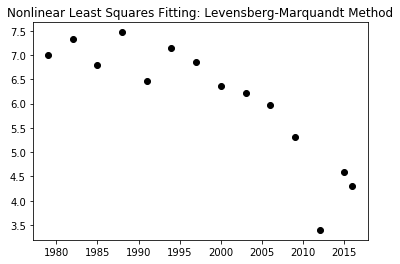

In [23]:
# Due to the shape of the data, a negative exponential function should be worth a try: p * -e^(x + p)

# function to calculate residuals 
def residuals(p, y, x): 
    r = y - pval(x, p)
    return r
# fitting function 
def pval(x, p): 
    return np.exp(x + p)

# initial guess for the parameter
p_0 = 1.0 

# leastsq uses the levensberg-marquandt algorithm 
pname = [['p']]
p0 = array([p_0])
plsq = leastsq(residuals, p0, args=(ice_areas,years), maxfev=2000)
print(plsq)

# plot
plt.plot(years, ice_areas, 'ko', pval(years, plsq[0]), 'k')
plt.title('Nonlinear Least Squares Fitting: Levensberg-Marquandt Method')
 
resid=sum(np.sqrt((ice_areas-pval(years, plsq[0]))**2))
print(resid)
print(plsq[0])

In [24]:
# Note: I haven't been able to debug this yet, but figured it might be useful for you guys to see it too